In [2]:
import numpy as np
import urllib.request
import gzip
import os

# Function to download and extract MNIST dataset
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    files = ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]

    for file in files:
        url = base_url + file
        filename = os.path.join(os.getcwd(), file)
        urllib.request.urlretrieve(url, filename)

# Function to load MNIST data
def load_mnist():
    # Download MNIST dataset if not already downloaded
    if not all(os.path.exists(file) for file in ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz",
                                                 "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]):
        download_mnist()

    # Load training images
    with gzip.open("train-images-idx3-ubyte.gz", "rb") as f:
        train_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

    # Load training labels
    with gzip.open("train-labels-idx1-ubyte.gz", "rb") as f:
        train_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

    # Load test images
    with gzip.open("t10k-images-idx3-ubyte.gz", "rb") as f:
        test_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

    # Load test labels
    with gzip.open("t10k-labels-idx1-ubyte.gz", "rb") as f:
        test_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

    return train_images, train_labels, test_images, test_labels

# Function to flatten and normalize images
def preprocess_images(images):
    # Flatten images
    flattened_images = images.reshape(images.shape[0], -1)

    # Normalize pixel values to be between 0 and 1
    normalized_images = flattened_images / 255.0

    return normalized_images

# Load MNIST data
train_images, train_labels, test_images, test_labels = load_mnist()

# Preprocess training and testing images
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

# Print the shapes of the preprocessed data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (60000, 784)
Training labels shape: (60000,)
Testing images shape: (10000, 784)
Testing labels shape: (10000,)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network model
model = models.Sequential()

# Flatten layer to transform input images (28 x 28) to a vector (784,)
model.add(layers.Flatten(input_shape=(784,)))  # Change input shape to (784,)

# Hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 neurons for digit classification and softmax activation
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3923 - accuracy: 0.8923 - val_loss: 0.2176 - val_accuracy: 0.9393
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.9469 - val_loss: 0.1563 - val_accuracy: 0.9563
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1327 - accuracy: 0.9623 - val_loss: 0.1330 - val_accuracy: 0.9621
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9703 - val_loss: 0.1135 - val_accuracy: 0.9661
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9762 - val_loss: 0.1024 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9810 - val_loss: 0.0975 - val_accuracy: 0.9714
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9835 - val_loss: 0.0903 - val_accuracy: 0.9725
Epoch 

## Part 4

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Print overall test accuracy
print(f"Overall Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate classification report
class_names = [str(i) for i in range(10)]
classification_rep = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


313/313 [==============================] - 0s 1ms/step
Overall Test Accuracy: 97.66%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 959    0    4    2    1    6    4    1    1    2]
 [   0 1125    4    0    0    1    2    0    3    0]
 [   2   

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9925 - val_loss: 0.0867 - val_accuracy: 0.9753
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9933 - val_loss: 0.0881 - val_accuracy: 0.9736
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0181 - accuracy: 0.9963 - val_loss: 0.0828 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.0850 - val_accuracy: 0.9755
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.0847 - val_accuracy: 0.9768
Epoch 

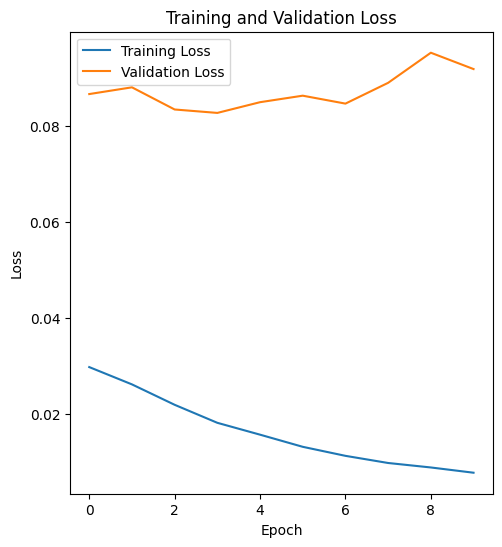

313/313 [==============================] - 0s 1ms/step


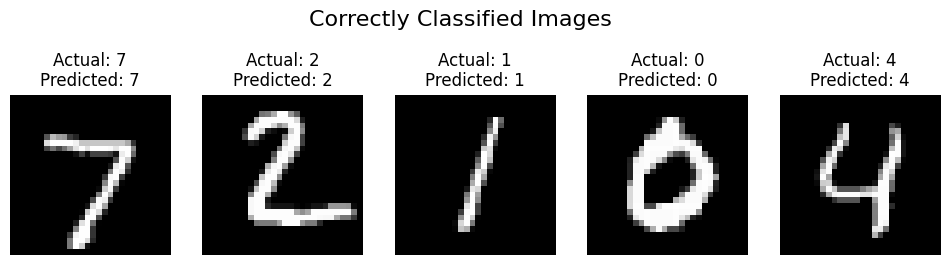

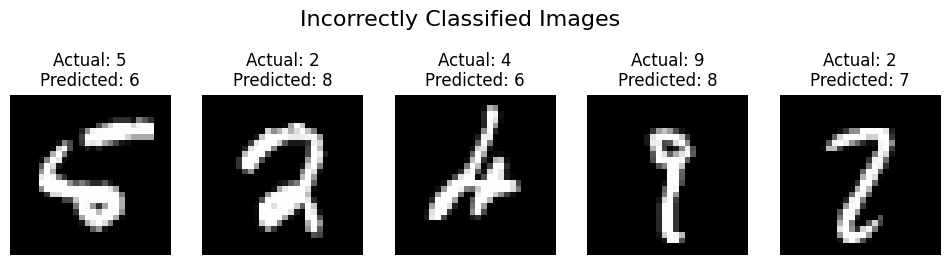

In [12]:
import matplotlib.pyplot as plt
import random

# Train the model with history tracking
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Plot training and validation loss curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find correctly and incorrectly classified indices
correct_indices = np.where(predicted_labels == test_labels)[0]
incorrect_indices = np.where(predicted_labels != test_labels)[0]

# Display 5 correctly classified images
plt.figure(figsize=(12, 6))
plt.suptitle('Correctly Classified Images', fontsize=16)

for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {test_labels[idx]}\nPredicted: {predicted_labels[idx]}")
    plt.axis('off')

# Display 5 incorrectly classified images
plt.figure(figsize=(12, 6))
plt.suptitle('Incorrectly Classified Images', fontsize=16)

for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {test_labels[idx]}\nPredicted: {predicted_labels[idx]}")
    plt.axis('off')

# Display the plots
plt.show()


Examining the loss curves of training and validation can provide insights into the performance of the trained network. Here are some observations and suggestions:

1. **Overfitting:**
   - If the training loss is decreasing while the validation loss starts to increase or remains stagnant after a certain point, it indicates overfitting.
   - **Suggestion:** Regularization techniques like dropout or L2 regularization can be applied to reduce overfitting. Additionally, collecting more diverse training data or reducing the complexity of the model may help.

2. **Underfitting:**
   - If both training and validation losses are high and don't decrease significantly over epochs, it indicates underfitting.
   - **Suggestion:** Consider increasing the model complexity, adding more layers or neurons, or training for more epochs. It could also be beneficial to examine if the model architecture is suitable for the problem at hand.

3. **Learning Rate Issues:**
   - If the loss curves exhibit erratic behavior or fail to converge, it might be a sign that the learning rate is too high or too low.
   - **Suggestion:** Adjust the learning rate. If the learning rate is too high, the model may overshoot the optimal weights; if it's too low, the model may converge too slowly. Experiment with different learning rates to find an optimal value.

4. **Data Augmentation:**
   - If the amount of training data is limited, data augmentation techniques can be applied to artificially increase the size of the training set. This may improve the generalization performance of the model.
   - **Suggestion:** Augment the training dataset by applying random transformations to the images, such as rotation, zoom, and horizontal flips.

5. **Architecture Selection:**
   - The chosen architecture might not be optimal for the given problem. For more complex tasks, deeper or more sophisticated architectures may be needed.
   - **Suggestion:** Experiment with different architectures or consider using pre-trained models (transfer learning) if applicable to the problem.

6. **Class Imbalance:**
   - If there is a significant class imbalance in the dataset, the model may perform well on the majority class but poorly on minority classes.
   - **Suggestion:** Explore techniques to handle class imbalance, such as adjusting class weights, oversampling, or undersampling.

7. **Hyperparameter Tuning:**
   - The model's performance can be sensitive to hyperparameters such as batch size, the number of neurons, and layer architectures.
   - **Suggestion:** Conduct a systematic hyperparameter search to find the optimal combination for your specific problem.

Analyzing the loss curves and adjusting the model and training process accordingly can help address issues and improve the performance of the neural network. It's often an iterative process of experimentation and refinement.